# Imports

In [1]:
import tarfile
import os
import tensorflow as tf
import cv2

In [2]:
import cv2
import imghdr
import numpy as np

In [3]:
data_dir = r"C:\Users\smitr\Downloads\NEWmined\Split_data_final"

# Load The Data

In [4]:
img = cv2.imread(os.path.join(r"C:\Users\smitr\Downloads\NEWmined\Split_data_final\BG\010000.png_392.png"))

In [5]:
img.shape

(38, 208, 3)

In [6]:
from matplotlib import pyplot as plt

In [7]:
data = tf.keras.utils.image_dataset_from_directory(data_dir, image_size=(224,224))

Found 111668 files belonging to 5 classes.


In [8]:
len(data)

3490

In [9]:
data_iterator = data.as_numpy_iterator()

In [10]:
batch = data_iterator.next()
batch[0].shape

(32, 224, 224, 3)

In [11]:
len(batch)

2

In [12]:
len(batch[0][0:2][0][0])

224

In [13]:
len(batch[0])

32

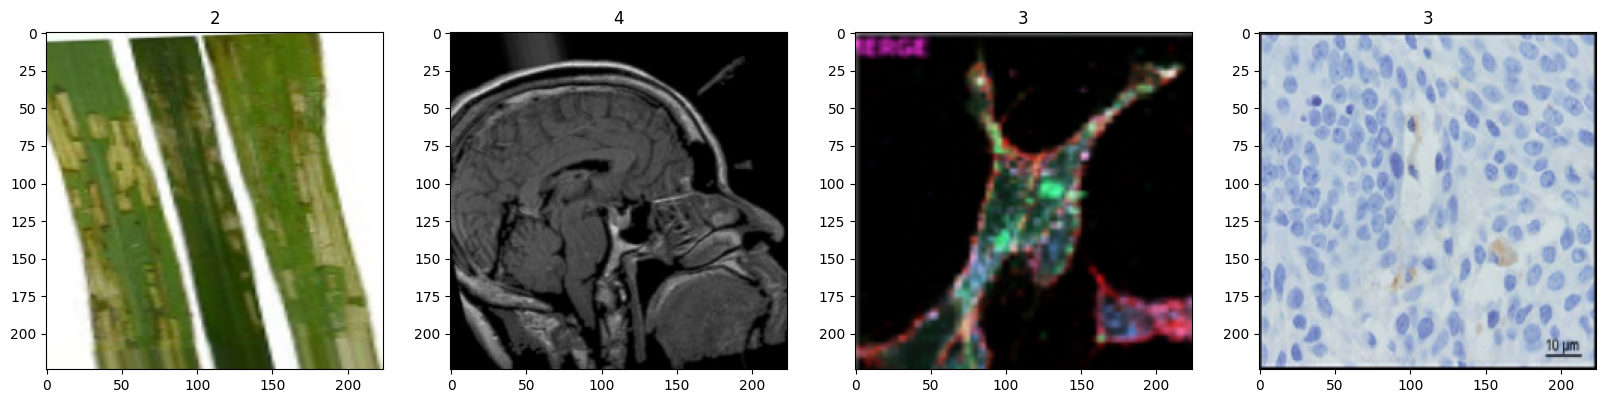

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [15]:
data = data.map(lambda x,y: (x/224.,y))

In [16]:
scaled_iterator = data.as_numpy_iterator()

In [17]:
batch = scaled_iterator.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


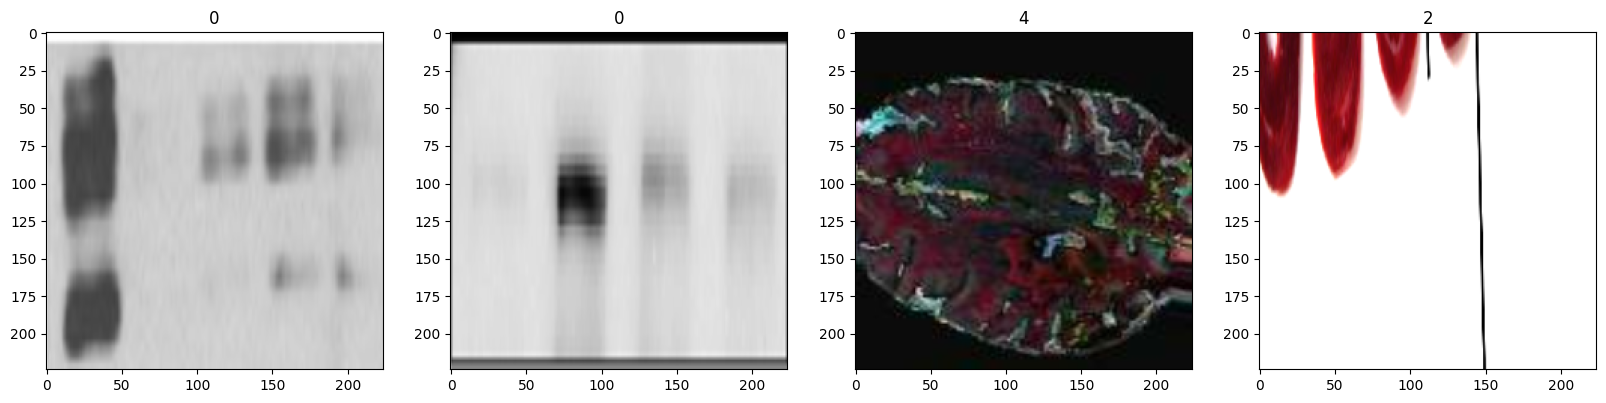

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [19]:
len(data)

3490

In [20]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1


In [21]:
train_size + val_size + test_size

3492

In [22]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [24]:
model = Sequential()

In [25]:
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))


In [26]:
model.compile('adam',
              loss=tf.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 32)        0

In [28]:
hist = model.fit(train, epochs=(15), validation_data=val)

Epoch 1/15
2443/2443 [==============================] - 128s 48ms/step - loss: 0.3985 - accuracy: 0.8515 - val_loss: 1.9237 - val_accuracy: 0.6867
Epoch 2/15
2443/2443 [==============================] - 114s 47ms/step - loss: 0.1768 - accuracy: 0.9400 - val_loss: 0.3812 - val_accuracy: 0.8887
Epoch 3/15
2443/2443 [==============================] - 115s 47ms/step - loss: 0.1206 - accuracy: 0.9596 - val_loss: 0.4473 - val_accuracy: 0.8702
Epoch 4/15
2443/2443 [==============================] - 111s 45ms/step - loss: 0.0982 - accuracy: 0.9675 - val_loss: 0.1498 - val_accuracy: 0.9517
Epoch 5/15
2443/2443 [==============================] - 115s 47ms/step - loss: 0.0815 - accuracy: 0.9733 - val_loss: 0.0924 - val_accuracy: 0.9692
Epoch 6/15
2443/2443 [==============================] - 110s 45ms/step - loss: 0.0712 - accuracy: 0.9760 - val_loss: 0.1249 - val_accuracy: 0.9588
Epoch 7/15
2443/2443 [==============================] - 111s 45ms/step - loss: 0.0641 - accuracy: 0.9790 - val_loss: 0

In [29]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


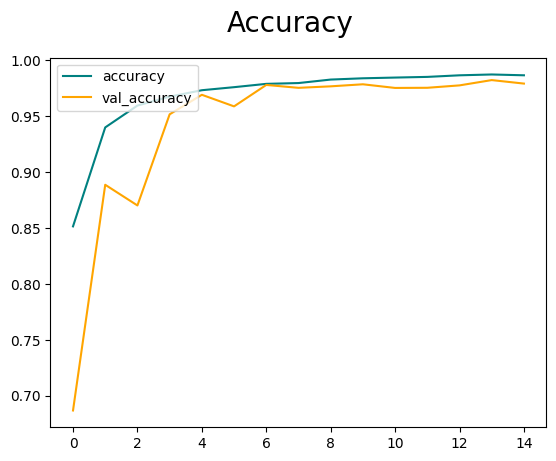

In [30]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

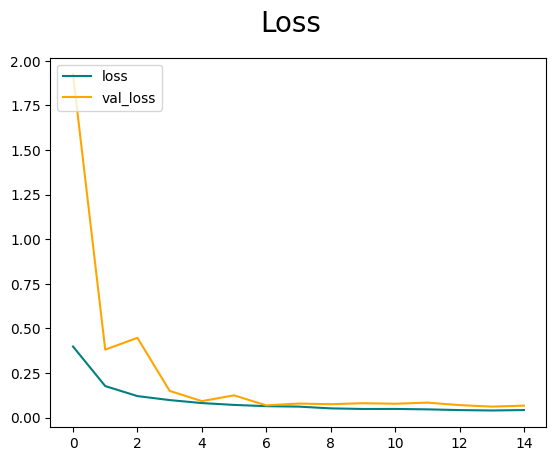

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()


In [125]:
from tensorflow.keras.models import load_model
import cv2
import keras
import tensorflow as tf
from matplotlib import pyplot as plt

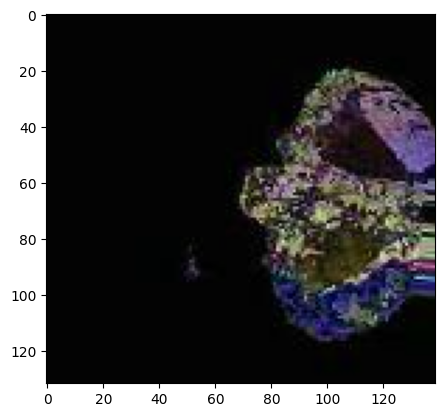

In [130]:
img = cv2.imread(r"C:\Users\smitr\Downloads\MineD_Final\none.jpg")
plt.imshow(img)
plt.show()

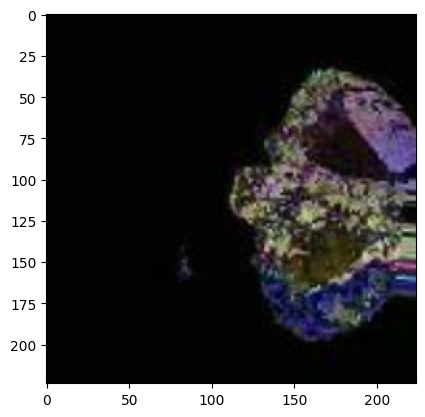

In [131]:
resize = tf.image.resize(img, (224,224))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [132]:
classes = ['BG', 'FACS', 'Macroscopy', 'Microscopy','None of the above',]

In [133]:
model_path = r'C:\Users\smitr\Downloads\MineD_Final\Model'  
tf.keras.models.save_model(model, model_path)
# Load the saved model
loaded_model = tf.keras.models.load_model(model_path)

# Assuming 'resize' and 'classes' are defined elsewhere in your code
# For example:
# resize = ...  # Your resizing logic
# classes = [...]  # Your list of class labels

# Make predictions using the loaded model
predictions = loaded_model.predict(tf.expand_dims(resize / 224, 0))
predicted_class_index = tf.argmax(predictions, axis=1).numpy()[0]
predicted_class_label = classes[predicted_class_index]

print("Predicted class label:", predicted_class_label)


INFO:tensorflow:Assets written to: C:\Users\smitr\Downloads\MineD_Final\Model\assets


INFO:tensorflow:Assets written to: C:\Users\smitr\Downloads\MineD_Final\Model\assets


1/1 [==============================] - 0s 68ms/step
Predicted class label: None of the above
